In [75]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization, Dropout

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [44]:
iris = load_iris()

In [45]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [46]:
data = pd.DataFrame(iris['data'], columns = iris['feature_names'] )
target = pd.DataFrame(iris['target'],columns = ['target'])

In [47]:
#combine the input predictors and target so that it can be split into training and testing
data_target = data.join(target)

In [48]:
data_target.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
data_target['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [50]:
#for this implementaion, let's make the problem a binary. So considering only '0' and '1' as the target
X = np.array(data_target[(data_target['target'] == 0) | (data_target['target'] == 1)].drop('target', axis=1))
y = np.array(data_target[(data_target['target'] == 0) | (data_target['target'] == 1)]['target']).reshape(100,1)

In [51]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.2)

print('Shape of train_x:', train_x.shape)
print('Shape of train_y:', train_y.shape)
print('Shape of test_x:', test_x.shape)
print('Shape of test_y:', test_y.shape)

Shape of train_x: (80, 4)
Shape of train_y: (80, 1)
Shape of test_x: (20, 4)
Shape of test_y: (20, 1)


In [117]:
model = Sequential()
model.add(Dense(50, input_shape = (4, ),kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(50,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(1,kernel_initializer='glorot_normal'))
model.add(Activation('sigmoid'))

In [118]:
adam = optimizers.Adam(lr = 0.001)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [119]:
checkpoint = ModelCheckpoint("model.best.h5", monitor="val_accuracy", verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1)
stop = EarlyStopping(monitor="val_accuracy", patience=5)

callbacklist = [checkpoint, reduce_lr, stop]

In [120]:
history = model.fit(train_x, train_y, batch_size=9, validation_data=(test_x, test_y), epochs=16, callbacks=callbacklist)

Train on 80 samples, validate on 20 samples
Epoch 1/16
80/80 [==============================] - 0s 4ms/step - loss: 1.0679 - accuracy: 0.5000 - val_loss: 0.6096 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to model.best.h5
Epoch 2/16
80/80 [==============================] - 0s 266us/step - loss: 0.4003 - accuracy: 0.7875 - val_loss: 0.2557 - val_accuracy: 1.0000

Epoch 00002: val_accuracy improved from 0.50000 to 1.00000, saving model to model.best.h5
Epoch 3/16
80/80 [==============================] - 0s 197us/step - loss: 0.2034 - accuracy: 1.0000 - val_loss: 0.1517 - val_accuracy: 1.0000

Epoch 00003: val_accuracy did not improve from 1.00000
Epoch 4/16
80/80 [==============================] - 0s 207us/step - loss: 0.1327 - accuracy: 1.0000 - val_loss: 0.0961 - val_accuracy: 1.0000

Epoch 00004: val_accuracy did not improve from 1.00000
Epoch 5/16
80/80 [==============================] - 0s 243us/step - loss: 0.0878 - accuracy: 1.0000

In [121]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])

In [122]:
history.history

{'val_loss': [0.6096284627914429,
  0.25567423477768897,
  0.15167135372757912,
  0.09613400846719741,
  0.06661120411008596,
  0.04864553883671761,
  0.03792096860706806],
 'val_accuracy': [0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'loss': [1.0678849205374719,
  0.4002570915967226,
  0.20344116929918526,
  0.13271668264642358,
  0.08784867012873292,
  0.06390869743190705,
  0.049139534728601574],
 'accuracy': [0.5, 0.7875, 1.0, 1.0, 1.0, 1.0, 1.0],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]}

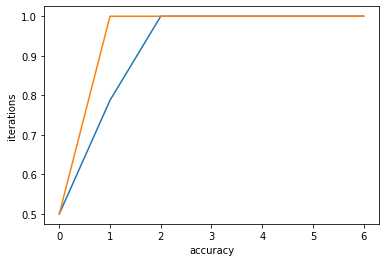

In [123]:
#visualize the details
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('accuracy')
plt.ylabel('iterations')
plt.show()

In [126]:
model = Sequential()
model.add(Dense(50, input_shape = (4, ),kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(50,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(1,kernel_initializer='glorot_normal'))
model.add(Activation('sigmoid'))

In [127]:
adam = optimizers.Adam(lr = 0.001)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [128]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='log')

%load_ext tensorboard
%tensorboard --logdir='log'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 2520), started 0:04:44 ago. (Use '!kill 2520' to kill it.)

In [130]:
history = model.fit(train_x, train_y, batch_size=9, validation_data=(test_x, test_y), epochs=16, callbacks=[tensorboard])

Train on 80 samples, validate on 20 samples
Epoch 1/16
80/80 [==============================] - 1s 10ms/step - loss: 0.3601 - accuracy: 0.7875 - val_loss: 0.1535 - val_accuracy: 1.0000
Epoch 2/16
80/80 [==============================] - 0s 208us/step - loss: 0.1403 - accuracy: 1.0000 - val_loss: 0.0916 - val_accuracy: 1.0000
Epoch 3/16
80/80 [==============================] - 0s 256us/step - loss: 0.0717 - accuracy: 1.0000 - val_loss: 0.0553 - val_accuracy: 1.0000
Epoch 4/16
80/80 [==============================] - 0s 260us/step - loss: 0.0504 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 1.0000
Epoch 5/16
80/80 [==============================] - 0s 195us/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 6/16
 9/80 [==>...........................] - ETA: 0s - loss: 0.0223 - accuracy: 1.0000

C:\Users\91965\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.271190). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


80/80 [==============================] - 0s 378us/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 7/16
80/80 [==============================] - 0s 416us/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 8/16
80/80 [==============================] - 0s 276us/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 9/16
80/80 [==============================] - 0s 228us/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 10/16
80/80 [==============================] - 0s 246us/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 11/16
80/80 [==============================] - 0s 231us/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 12/16
80/80 [==============================] - 0s 254us/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 13/16
80

#### loading the best weights file

In [131]:
model.load_weights('model.best.h5')

In [132]:
print(model.metrics_names[1], model.evaluate(train_x, train_y)[1])

80/80 [==============================] - 0s 127us/step
accuracy 1.0
